<a href="https://colab.research.google.com/github/abksyed/EVA4/blob/master/12_TinyImageNet_Classification/Assignment_S12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install albumentations==0.4.5 --quiet

     |████████████████████████████████| 122kB 9.2MB/s 
     |████████████████████████████████| 634kB 29.8MB/s 


In [ ]:
!git clone https://github.com/abksyed/TinyImageNetDataset.git

Cloning into 'TinyImageNetDataset'...
remote: Enumerating objects: 120574, done.
remote: Total 120574 (delta 0), reused 0 (delta 0), pack-reused 120574
Receiving objects: 100% (120574/120574), 212.26 MiB | 14.59 MiB/s, done.
Resolving deltas: 100% (1108/1108), done.
Checking out files: 100% (120204/120204), done.


In [ ]:
!ls TinyImageNetDataset/

README.md  test  train	val  wnids.txt	words.txt


In [ ]:
!pip install pynoob-0.1.0.7 --quiet

In [ ]:
from pynoob import *
device = 'cuda'
sara = Sara(device, model_name= ResNet18_S12, criterion= nn.CrossEntropyLoss()) #Sara is a DeepLearning Personal Assistant/

In [ ]:
train_loader, val_loader, test_loader = sara.loaders(trans= TinyImageNet_AlbumTrans, dataset= TinyImageNetDataLoader, batch_size=256, split= 0.7)

starting loading data
finished loading data, in 32.91454339027405 seconds
starting loading data
finished loading data, in 3.2221250534057617 seconds


In [ ]:
print(f"The number of training set batches are: {len(train_loader)} and number of images are: {len(train_loader.dataset)}\
\nThe number of validation set batches are: {len(val_loader)} and number of images are: {len(val_loader.dataset)}\
\nThe number of test set batches are: {len(test_loader)} and number of images are: {len(test_loader.dataset)}")

The number of training set batches are: 274 and number of images are: 69999
The number of validation set batches are: 118 and number of images are: 30001
The number of test set batches are: 40 and number of images are: 10000


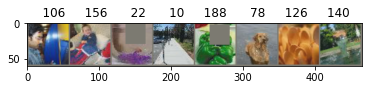

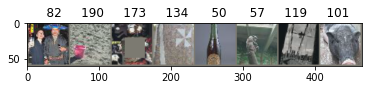

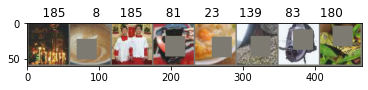

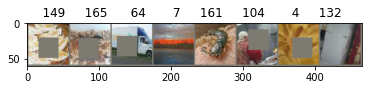

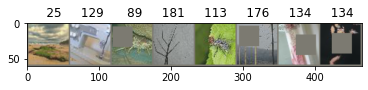

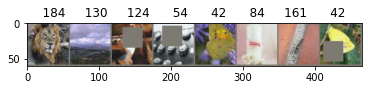

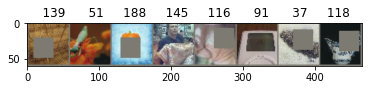

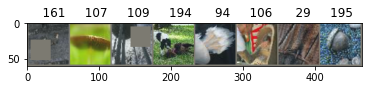

In [ ]:
sara.display_samples(train_loader, 64, dataset_used='TinyImageNet') #displaying 64 training images

#Augmentations: RandomCrop(56,56) -> HorizontalFlip -> Rotate(-20,20) -> Cutout(1,28,28) -> Normalize -> ToTensor

In [ ]:
model, model_summary = sara.model(input_size= (3,56,56)) #Model Summary

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 56, 56]           1,728
       BatchNorm2d-2           [-1, 64, 56, 56]             128
            Conv2d-3           [-1, 64, 56, 56]          36,864
       BatchNorm2d-4           [-1, 64, 56, 56]             128
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
        BasicBlock-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
           Conv2d-10           [-1, 64, 56, 56]          36,864
      BatchNorm2d-11           [-1, 64, 56, 56]             128
       BasicBlock-12           [-1, 64, 56, 56]               0
           Conv2d-13          [-1, 128, 28, 28]          73,728
      BatchNorm2d-14          [-1, 128,


Learnign Rate for least Loss 4.133498497351803 : 1.6636763260030194
Learnign Rate for highest Accuracy 11.677741516366883 : 0.9141460764649556
Learning rate search finished. See the graph with {finder_name}.plot()


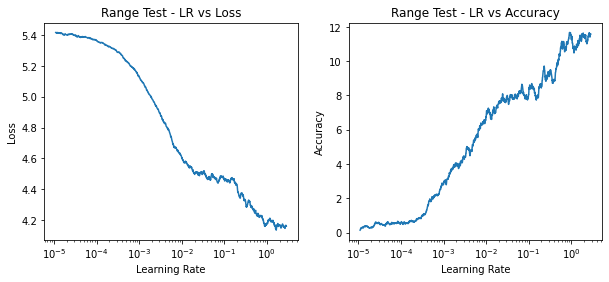

In [ ]:
sara.find_lr(train_loader, min_lr= 1e-5, end_lr= 3, num_iter= 5*len(train_loader), 
             momentum= 0.9,step_mode= 'exp', log_lr=True, best_lr_from= 'loss')

  0%|          | 0/274 [00:00<?, ?it/s]

====================START====================
==================== EPOCH: 1 ====================
LR used: 0.016636763260030163


Loss=4.6234917640686035 Batch_id=273 Accuracy=4.51: 100%|██████████| 274/274 [01:21<00:00,  3.35it/s]
  0%|          | 0/274 [00:00<?, ?it/s]


Test set: Average loss: 0.0184, Accuracy: 1860/30001 (6.20%)

==================== EPOCH: 2 ====================
LR used: 0.05697188407756126


Loss=4.075530052185059 Batch_id=273 Accuracy=9.20: 100%|██████████| 274/274 [01:21<00:00,  3.35it/s]
  0%|          | 0/274 [00:00<?, ?it/s]


Test set: Average loss: 0.0178, Accuracy: 2677/30001 (8.92%)

==================== EPOCH: 3 ====================
LR used: 0.17402610410913022


Loss=3.996729850769043 Batch_id=273 Accuracy=14.77: 100%|██████████| 274/274 [01:21<00:00,  3.35it/s]
  0%|          | 0/274 [00:00<?, ?it/s]


Test set: Average loss: 0.0156, Accuracy: 4443/30001 (14.81%)

==================== EPOCH: 4 ====================
LR used: 0.3563330415774537


Loss=3.4031689167022705 Batch_id=273 Accuracy=19.69: 100%|██████████| 274/274 [01:21<00:00,  3.35it/s]
  0%|          | 0/274 [00:00<?, ?it/s]


Test set: Average loss: 0.0148, Accuracy: 5562/30001 (18.54%)

==================== EPOCH: 5 ====================
LR used: 0.5860342976559425


Loss=3.4154040813446045 Batch_id=273 Accuracy=24.30: 100%|██████████| 274/274 [01:21<00:00,  3.35it/s]
  0%|          | 0/274 [00:00<?, ?it/s]


Test set: Average loss: 0.0137, Accuracy: 6779/30001 (22.60%)

==================== EPOCH: 6 ====================
LR used: 0.8406288271348883


Loss=2.923705816268921 Batch_id=273 Accuracy=28.61: 100%|██████████| 274/274 [01:21<00:00,  3.35it/s]
  0%|          | 0/274 [00:00<?, ?it/s]


Test set: Average loss: 0.0126, Accuracy: 8334/30001 (27.78%)

==================== EPOCH: 7 ====================
LR used: 1.0951770928269424


Loss=2.7562344074249268 Batch_id=273 Accuracy=32.22: 100%|██████████| 274/274 [01:21<00:00,  3.35it/s]
  0%|          | 0/274 [00:00<?, ?it/s]


Test set: Average loss: 0.0117, Accuracy: 9662/30001 (32.21%)

==================== EPOCH: 8 ====================
LR used: 1.3247440894466633


Loss=2.6419270038604736 Batch_id=273 Accuracy=35.74: 100%|██████████| 274/274 [01:21<00:00,  3.35it/s]
  0%|          | 0/274 [00:00<?, ?it/s]


Test set: Average loss: 0.0126, Accuracy: 9044/30001 (30.15%)

==================== EPOCH: 9 ====================
LR used: 1.5068419235546167


Loss=2.4621875286102295 Batch_id=273 Accuracy=38.82: 100%|██████████| 274/274 [01:21<00:00,  3.35it/s]
  0%|          | 0/274 [00:00<?, ?it/s]


Test set: Average loss: 0.0118, Accuracy: 9883/30001 (32.94%)

==================== EPOCH: 10 ====================
LR used: 1.623632679643484


Loss=2.365478277206421 Batch_id=273 Accuracy=41.33: 100%|██████████| 274/274 [01:21<00:00,  3.35it/s]
  0%|          | 0/274 [00:00<?, ?it/s]


Test set: Average loss: 0.0105, Accuracy: 11411/30001 (38.04%)

==================== EPOCH: 11 ====================
LR used: 1.6636760829950128


Loss=2.43485426902771 Batch_id=273 Accuracy=44.13: 100%|██████████| 274/274 [01:21<00:00,  3.35it/s]
  0%|          | 0/274 [00:00<?, ?it/s]


Test set: Average loss: 0.0100, Accuracy: 12368/30001 (41.23%)

==================== EPOCH: 12 ====================
LR used: 1.6453664134747912


Loss=2.1896474361419678 Batch_id=273 Accuracy=46.82: 100%|██████████| 274/274 [01:21<00:00,  3.34it/s]
  0%|          | 0/274 [00:00<?, ?it/s]


Test set: Average loss: 0.0103, Accuracy: 12150/30001 (40.50%)

==================== EPOCH: 13 ====================
LR used: 1.5915020192204214


Loss=1.9408543109893799 Batch_id=273 Accuracy=49.14: 100%|██████████| 274/274 [01:21<00:00,  3.35it/s]
  0%|          | 0/274 [00:00<?, ?it/s]


Test set: Average loss: 0.0105, Accuracy: 12268/30001 (40.89%)

==================== EPOCH: 14 ====================
LR used: 1.5044370327308598


Loss=2.2967238426208496 Batch_id=273 Accuracy=51.52: 100%|██████████| 274/274 [01:21<00:00,  3.35it/s]
  0%|          | 0/274 [00:00<?, ?it/s]


Test set: Average loss: 0.0098, Accuracy: 13137/30001 (43.79%)

==================== EPOCH: 15 ====================
LR used: 1.387976611699858


Loss=1.8573118448257446 Batch_id=273 Accuracy=53.67: 100%|██████████| 274/274 [01:21<00:00,  3.35it/s]
  0%|          | 0/274 [00:00<?, ?it/s]


Test set: Average loss: 0.0095, Accuracy: 13566/30001 (45.22%)

==================== EPOCH: 16 ====================
LR used: 1.2472106353655725


Loss=1.7718002796173096 Batch_id=273 Accuracy=55.89: 100%|██████████| 274/274 [01:21<00:00,  3.35it/s]
  0%|          | 0/274 [00:00<?, ?it/s]


Test set: Average loss: 0.0091, Accuracy: 14315/30001 (47.72%)

==================== EPOCH: 17 ====================
LR used: 1.0882912523639092


Loss=1.8557926416397095 Batch_id=273 Accuracy=58.45: 100%|██████████| 274/274 [01:21<00:00,  3.35it/s]
  0%|          | 0/274 [00:00<?, ?it/s]


Test set: Average loss: 0.0091, Accuracy: 14521/30001 (48.40%)

==================== EPOCH: 18 ====================
LR used: 0.9181640023118465


Loss=1.733901858329773 Batch_id=273 Accuracy=61.06: 100%|██████████| 274/274 [01:21<00:00,  3.35it/s]
  0%|          | 0/274 [00:00<?, ?it/s]


Test set: Average loss: 0.0094, Accuracy: 14448/30001 (48.16%)

==================== EPOCH: 19 ====================
LR used: 0.7442642623977795


Loss=1.3624274730682373 Batch_id=273 Accuracy=64.30: 100%|██████████| 274/274 [01:21<00:00,  3.35it/s]
  0%|          | 0/274 [00:00<?, ?it/s]


Test set: Average loss: 0.0093, Accuracy: 14755/30001 (49.18%)

==================== EPOCH: 20 ====================
LR used: 0.5741922857194872


Loss=1.3359335660934448 Batch_id=273 Accuracy=67.35: 100%|██████████| 274/274 [01:21<00:00,  3.35it/s]
  0%|          | 0/274 [00:00<?, ?it/s]


Test set: Average loss: 0.0097, Accuracy: 14610/30001 (48.70%)

==================== EPOCH: 21 ====================
LR used: 0.4153810337536995


Loss=1.1332066059112549 Batch_id=273 Accuracy=71.01: 100%|██████████| 274/274 [01:21<00:00,  3.35it/s]
  0%|          | 0/274 [00:00<?, ?it/s]


Test set: Average loss: 0.0095, Accuracy: 15279/30001 (50.93%)

==================== EPOCH: 22 ====================
LR used: 0.2747713202722574


Loss=0.8240328431129456 Batch_id=273 Accuracy=75.23: 100%|██████████| 274/274 [01:21<00:00,  3.35it/s]
  0%|          | 0/274 [00:00<?, ?it/s]


Test set: Average loss: 0.0094, Accuracy: 15630/30001 (52.10%)

==================== EPOCH: 23 ====================
LR used: 0.15850846447456474


Loss=0.5690563917160034 Batch_id=273 Accuracy=79.24: 100%|██████████| 274/274 [01:21<00:00,  3.35it/s]
  0%|          | 0/274 [00:00<?, ?it/s]


Test set: Average loss: 0.0095, Accuracy: 15827/30001 (52.75%)

==================== EPOCH: 24 ====================
LR used: 0.07167371105005936


Loss=0.6890062093734741 Batch_id=273 Accuracy=82.13: 100%|██████████| 274/274 [01:21<00:00,  3.35it/s]
  0%|          | 0/274 [00:00<?, ?it/s]


Test set: Average loss: 0.0095, Accuracy: 16008/30001 (53.36%)

==================== EPOCH: 25 ====================
LR used: 0.018062155402769134


Loss=0.562095046043396 Batch_id=273 Accuracy=83.27: 100%|██████████| 274/274 [01:21<00:00,  3.35it/s]



Test set: Average loss: 0.0095, Accuracy: 16012/30001 (53.37%)

The Learning Rates used: {0.016636763260030163, 0.05697188407756126, 0.17402610410913022, 0.3563330415774537, 0.5860342976559425, 0.8406288271348883, 1.0951770928269424, 1.3247440894466633, 1.5068419235546167, 1.623632679643484, 1.6636760829950128, 1.2472106353655725, 1.0882912523639092, 0.7442642623977795, 0.018062155402769134, 1.5915020192204214, 0.9181640023118465, 1.5044370327308598, 1.387976611699858, 0.4153810337536995, 0.2747713202722574, 0.5741922857194872, 0.07167371105005936, 0.15850846447456474, 1.6453664134747912}


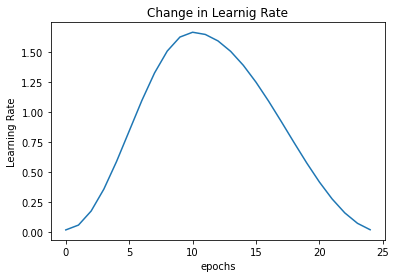

==================== RESULTS ====================
Best Train Accuracy:  83.26976099658566
Best Validation Accuracy:  53.37155428152395
Runnign Best Model on Test Loader:

Test set: Average loss: 0.0096, Accuracy: 5382/10000 (53.82%)

Best Testing Accuracy:  53.82


In [ ]:
scheduler = {'name': 'OneCycleLR', 'epochs': 25, 'steps': len(train_loader),
             'pct_start': 10/25, 'div_factor': 100, 'final_div_factor': 1000, 'anneal_strategy': 'cos'}
sara.fit(train_loader, test_loader, val_loader, epochs=25, scheduler= scheduler, plot_lr= True)

Best Model Loaded!


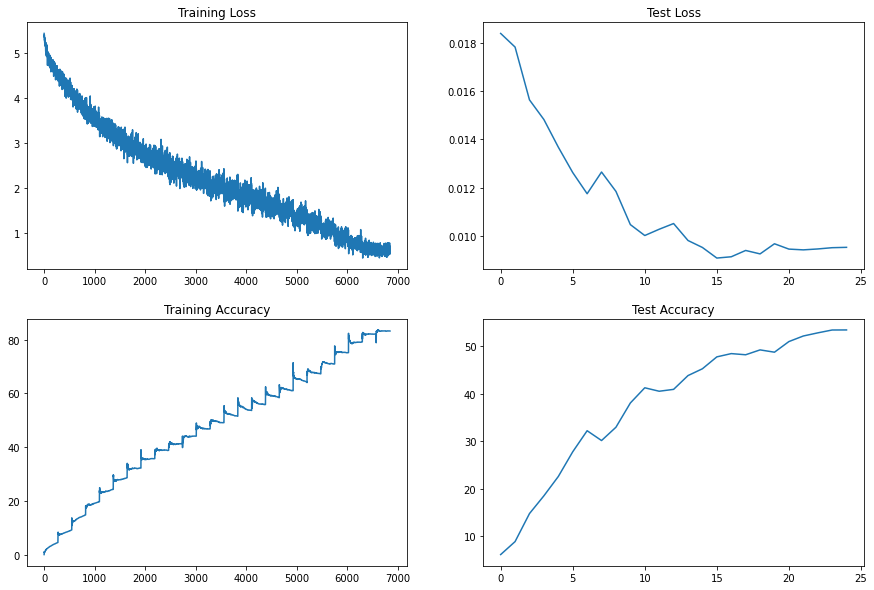

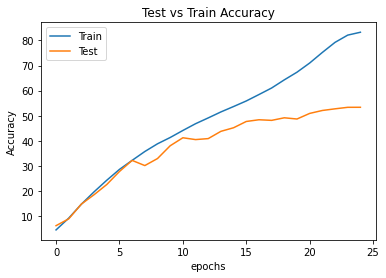

In [ ]:
sara.plot_graphs(test_loader, classwise_acc= False)


Test set: Average loss: -16.4690, Accuracy: 5382/10000 (53.82%)

torch.Size([4618, 3, 56, 56])


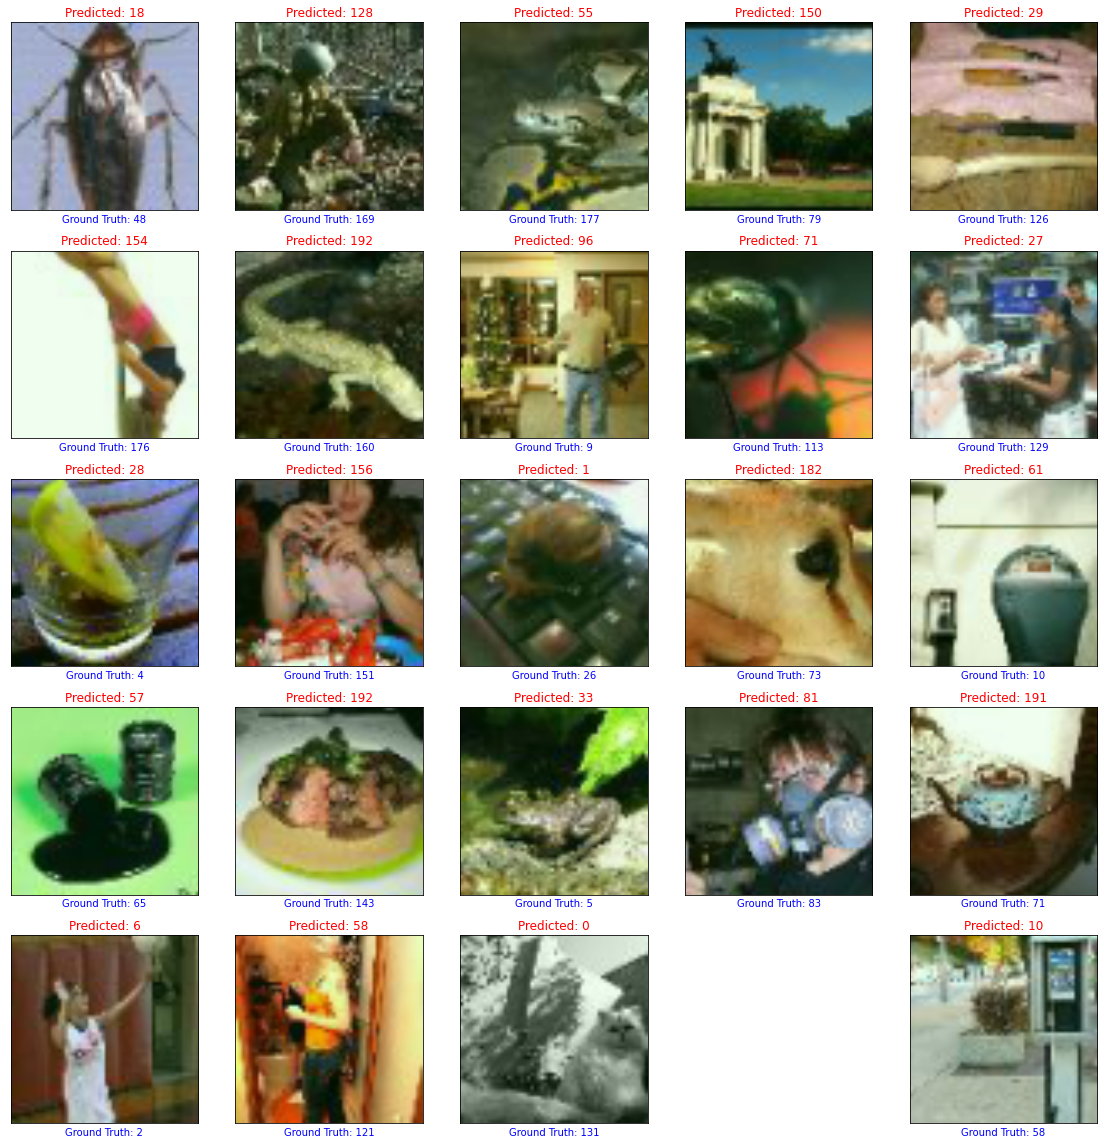

**********Grad-CAM of Mis Classified Images with respect to Predicted(wrong) Class**********


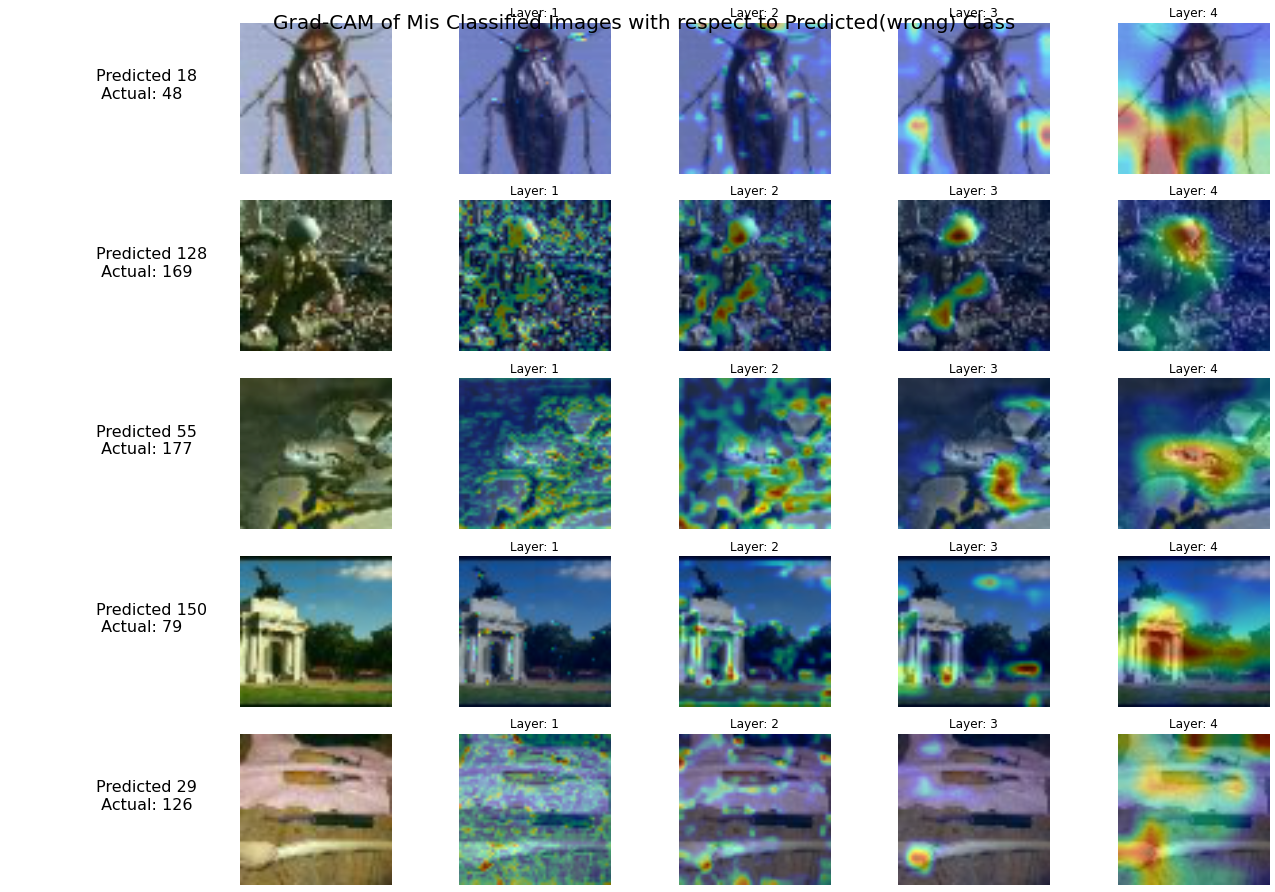

**********Grad-CAM of Mis Classified Images with respect to Actual(correct) Class**********


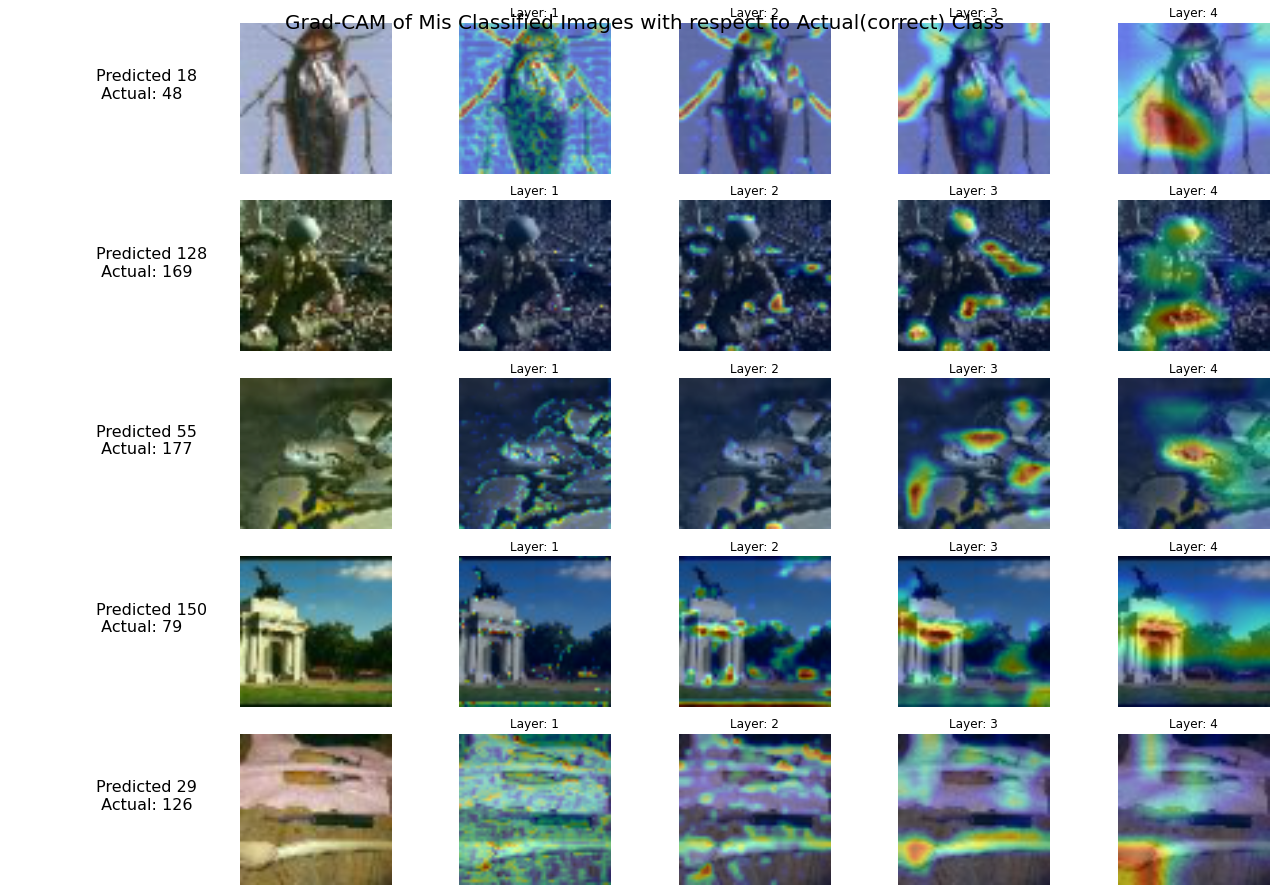

In [ ]:
sara.missed_images(test_loader, dataset_used='TinyImageNet', miss_no_images= 25, cam_no_images=5, layers=['layer1', 'layer2', 'layer3', 'layer4'])

In [ ]:
#To know about particular Class from above examples:
print('Predicted: ',sara.classes[6]) #Predicted
print('Actual: ',sara.classes[2]) #Actual
print('-------------------------------------')
#The was pretty close, Lets see one more:
print('Predicted: ',sara.classes[10]) #Predicted
print('Actual: ',sara.classes[58]) #Actual

Predicted:  ('n02802426', 'basketball')
Actual:  ('n04540053', 'volleyball')
-------------------------------------
Predicted:  ('n03891332', 'parking meter')
Actual:  ('n03902125', 'pay-phon')


In [ ]:
#List of all Classes for Reference
sara.classes

{0: ('n02124075', 'Egyptian cat'),
 1: ('n04067472', 'reel'),
 2: ('n04540053', 'volleyball'),
 3: ('n04099969', 'rocking chai'),
 4: ('n07749582', 'lemon'),
 5: ('n01641577', 'bullfro'),
 6: ('n02802426', 'basketball'),
 7: ('n09246464', 'clif'),
 8: ('n07920052', 'espresso'),
 9: ('n03970156', 'plunge'),
 10: ('n03891332', 'parking meter'),
 11: ('n02106662', 'German shepher'),
 12: ('n03201208', 'dining tabl'),
 13: ('n02279972', 'monarc'),
 14: ('n02132136', 'brown bea'),
 15: ('n04146614', 'school bus'),
 16: ('n07873807', 'pizz'),
 17: ('n02364673', 'guinea pi'),
 18: ('n04507155', 'umbrella'),
 19: ('n03854065', 'orga'),
 20: ('n03838899', 'obo'),
 21: ('n03733131', 'maypole'),
 22: ('n01443537', 'goldfis'),
 23: ('n07875152', 'potpie'),
 24: ('n03544143', 'hourglass'),
 25: ('n09428293', 'seashor'),
 26: ('n03085013', 'computer keyboar'),
 27: ('n02437312', 'Arabian came'),
 28: ('n07614500', 'ice crea'),
 29: ('n03804744', 'nail'),
 30: ('n04265275', 'space heater'),
 31: ('n0